In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.cluster import KMeans # k-means
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering

from sklearn.metrics import silhouette_score

%matplotlib inline

In [22]:
tweets = pd.read_csv('file path')
tweets.shape

(14640, 15)

## Cleaning Data

In [23]:
np.sum(tweets.isnull())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [24]:
#removing useless rows
tweets.drop(['negativereason_gold', 'airline_sentiment_gold', 'tweet_coord', 'tweet_id', 'tweet_created', 'tweet_location', 'text', 'name'], axis='columns', inplace=True)

#virgin america does not exist anymore and has very little data so it gets removed
tweets = tweets[tweets.airline != 'Virgin America']
tweets.reset_index(drop = True, inplace = True) #reset index

In [25]:
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,user_timezone
0,positive,1.0000,NaN,NaN,United,0,NaN
1,positive,1.0000,NaN,NaN,United,0,Eastern Time (US & Canada)
2,negative,1.0000,Cancelled Flight,0.703,United,0,Alaska
3,negative,1.0000,Late Flight,1.000,United,0,Mountain Time (US & Canada)
4,positive,0.3441,NaN,0.000,United,0,NaN


# Data Vizualization

### Visualizing Sentiment

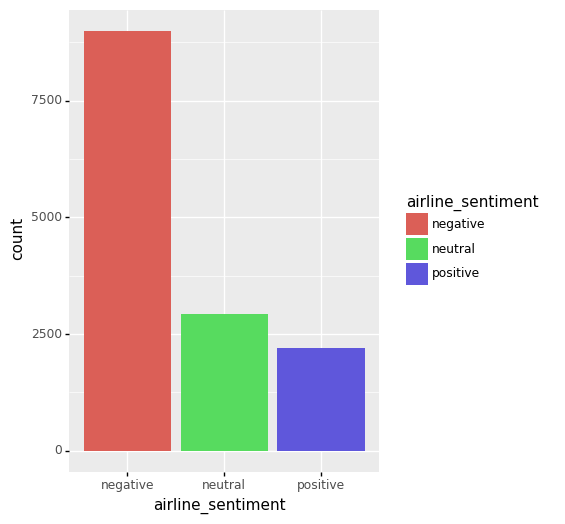

<ggplot: (8785542860213)>

In [26]:
ggplot(tweets, aes(x = 'airline_sentiment', fill = 'airline_sentiment')) + geom_bar() + theme(figure_size=(4, 6))

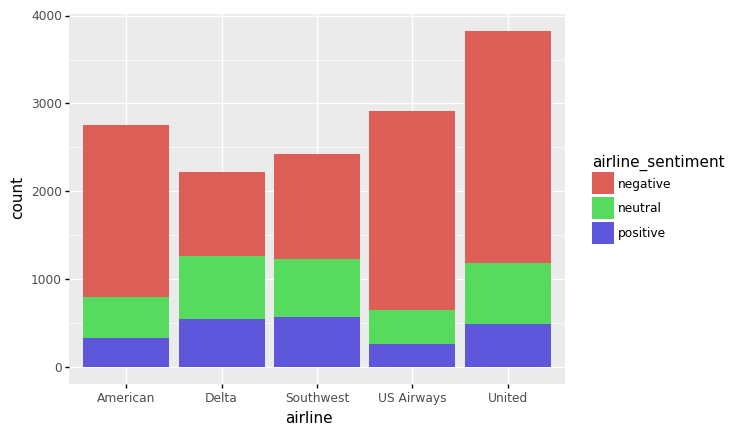

<ggplot: (8785542536924)>

In [27]:
ggplot(tweets, aes(x = 'airline', fill = 'airline_sentiment')) + geom_bar()

### Building Pie Chart

United:


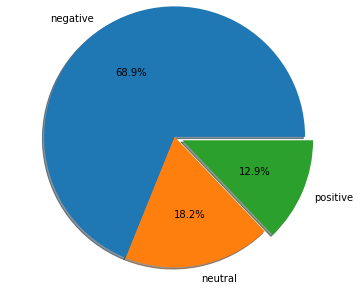

Southwest:


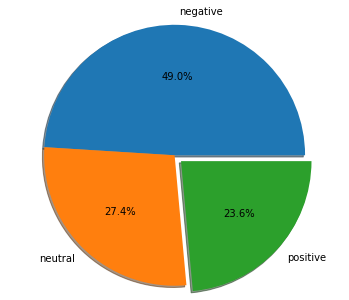

Delta:


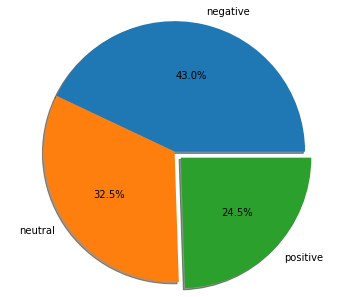

US Airways:


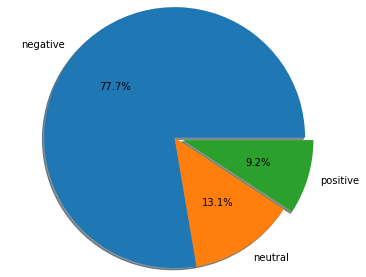

American:


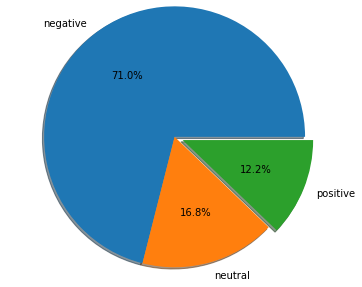

In [28]:
labels = ['negative', 'neutral', 'positive']
#getting names of each airline
airline_labels = tweets['airline'].unique()
#0 = American, 1 = Delta, 2 = Southwest, 3 = US Airways, 4 = United
airlines = [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]]

#populating airlines array
for i in range(len(airline_labels)):
    for j in range(len(tweets)):
        if tweets['airline'].iloc[j] == airline_labels[i]:
            if tweets['airline_sentiment'].iloc[j] == 'negative':
                (airlines[i])[0] += 1
            if tweets['airline_sentiment'].iloc[j] == 'neutral':
                (airlines[i])[1] += 1
            if tweets['airline_sentiment'].iloc[j] == 'positive':
                (airlines[i])[2] += 1

#printing pie charts
for i in range(len(airlines)):
    plt.axis('equal')
    plt.pie(airlines[i], labels = labels, radius = 1.5, autopct = '%0.1f%%', shadow = True, explode = [0,0,0.1])
    print(airline_labels[i] + ':')
    plt.show()

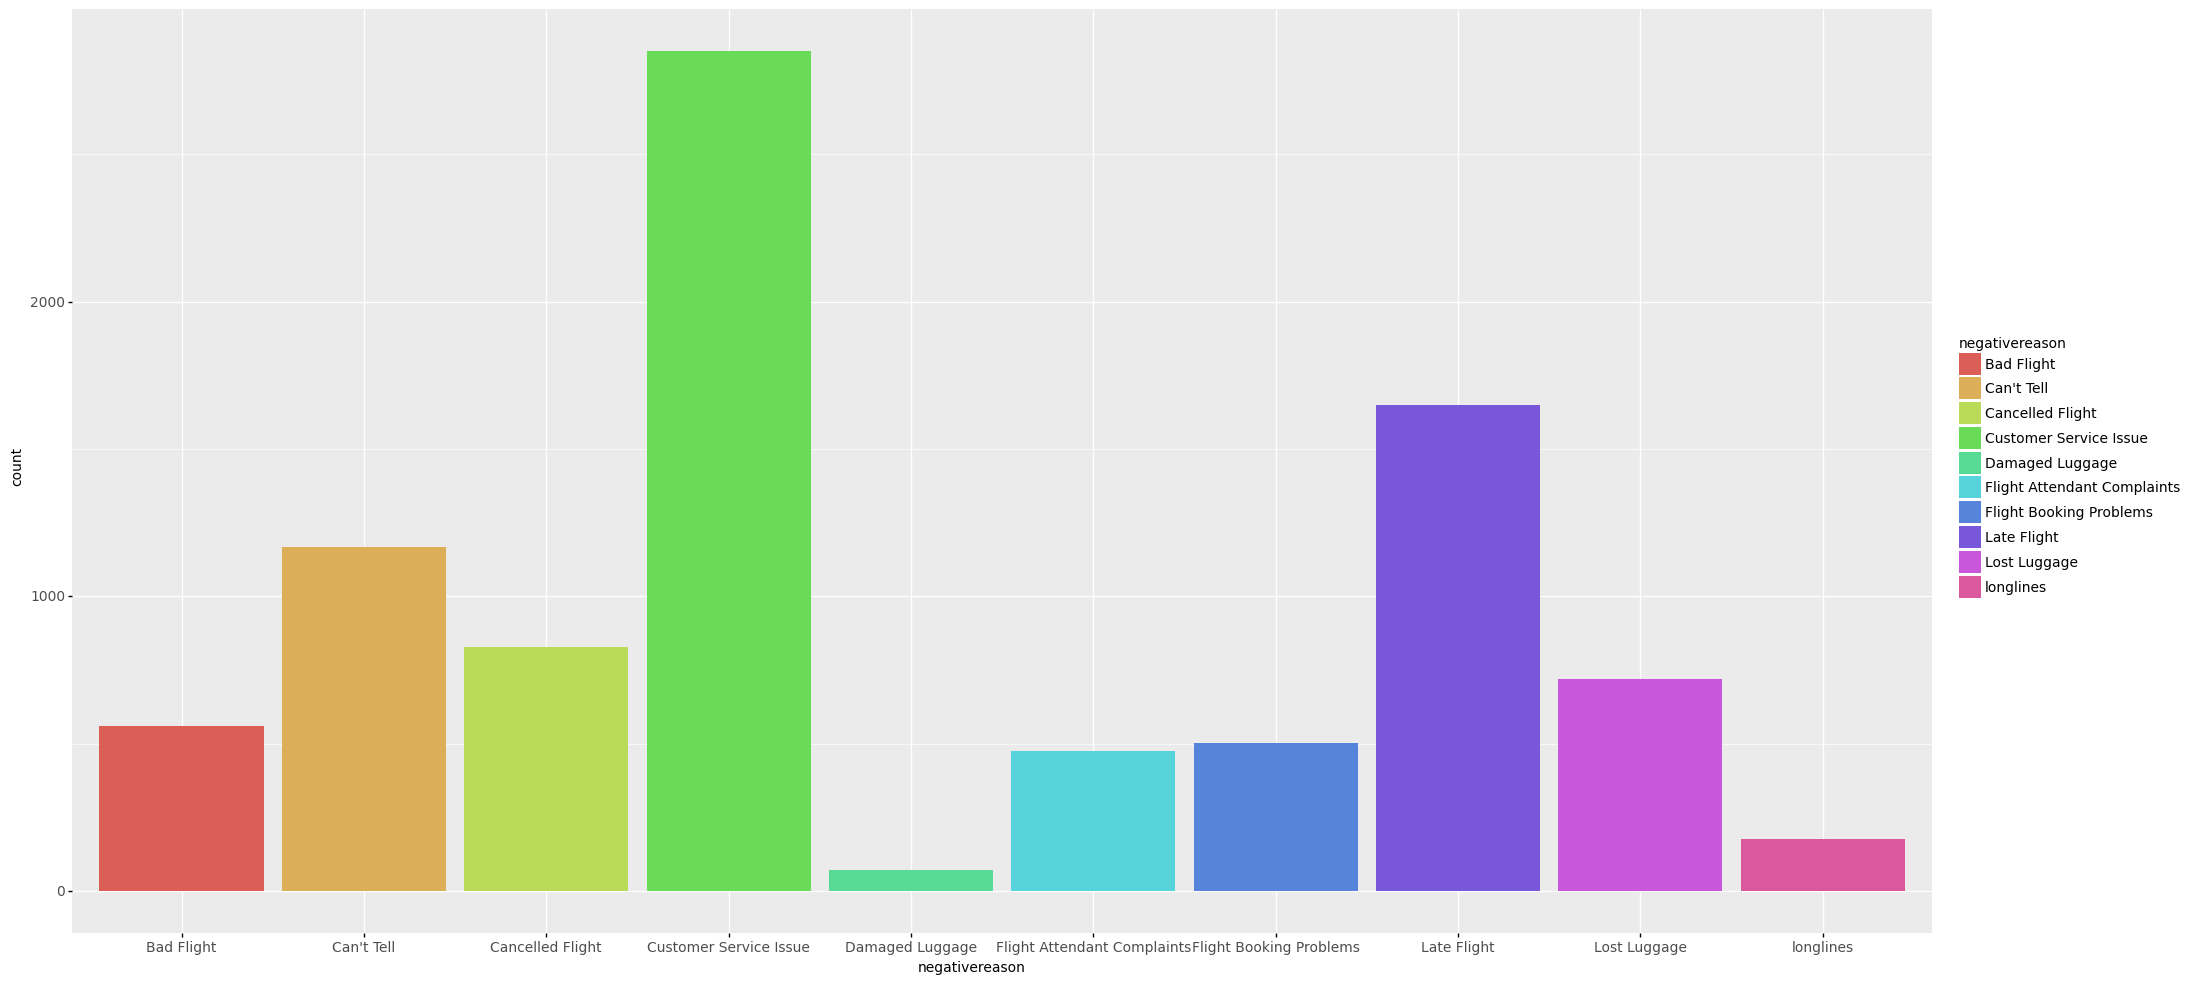

<ggplot: (8785542860147)>

In [29]:
#removing NA values for vizialization
tweets_clean = tweets
tweets_clean.dropna(subset = ['negativereason'], inplace=True)

ggplot(tweets_clean, aes(x = 'negativereason', fill = 'negativereason')) + geom_bar() + theme(text=element_text(size=10)) + theme(figure_size=(24, 12))

United:


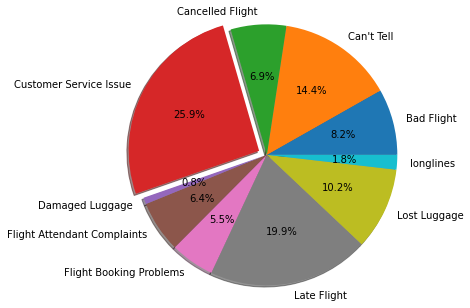

Southwest:


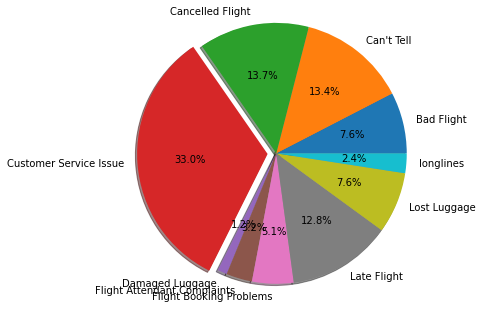

Delta:


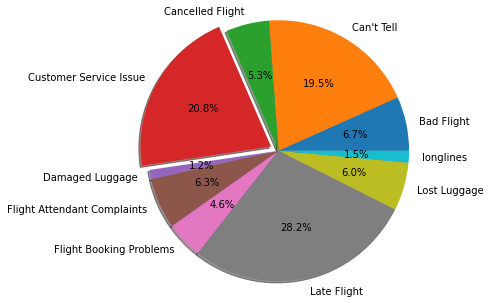

US Airways:


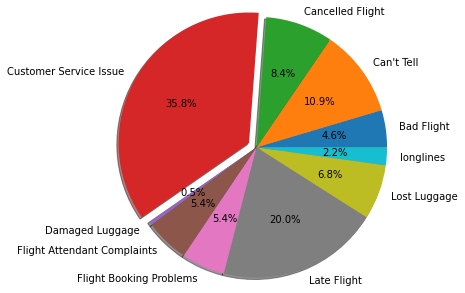

American:


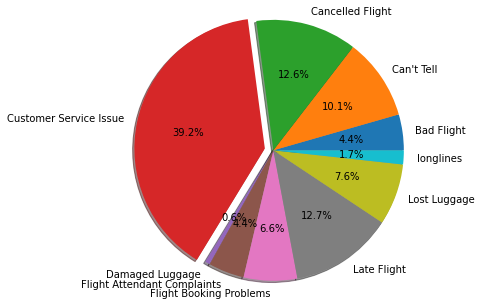

In [30]:
for i in range(len(airline_labels)):    
    data = tweets[tweets.airline == airline_labels[i]]

    values = [0,0,0,0,0,0,0,0,0,0]
    labels = data.groupby('negativereason').size()

    for j in range(len(labels)):
        values[j] = labels[j]

    plt.axis('equal')
    plt.pie(values, labels = labels.keys(), radius = 1.5, autopct = '%0.1f%%', shadow = True, explode = [0,0,0,0.1,0,0,0,0,0,0])
    print(airline_labels[i] + ':')
    plt.show()